## 라이브러리 import

In [1]:
import numpy       as np
import pandas      as pd
import matplotlib.pyplot as plt
import pywt

## 데이터 불러오기

In [2]:
Data = pd.read_csv('./ExampleData', sep=',', header=None)
Data.shape

(2774, 4)

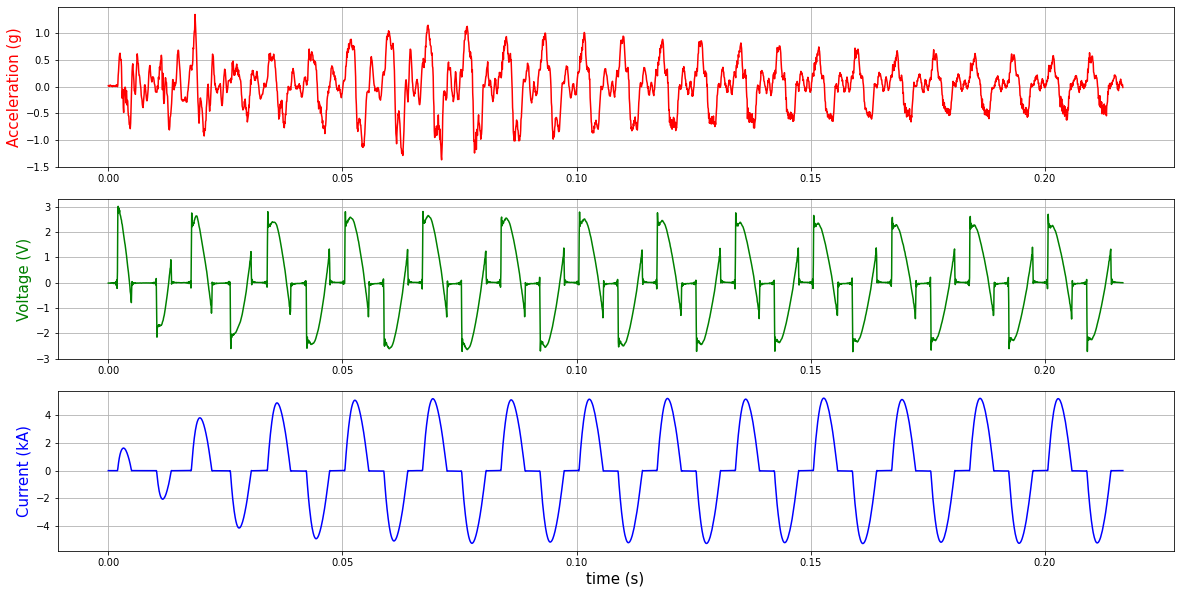

In [3]:
# 예제데이터 센서데이터 (1열 ~ 3열)
plt.figure(figsize=(20,10))

plt.subplot(3,1,1) # 가속도 데이터
plt.plot(Data.iloc[:,0] , Data.iloc[:,1], color='r')
plt.ylabel('Acceleration (g)',fontsize=15, color='r')
plt.grid()

plt.subplot(3,1,2)# 전압 데이터 
plt.plot(Data.iloc[:,0] , Data.iloc[:,2], color='g')
plt.ylabel('Voltage (V)',fontsize=15, color='g')
plt.grid()

plt.subplot(3,1,3) # 전류 데이터
plt.plot(Data.iloc[:,0] , Data.iloc[:,3], color=[0,0,1])
plt.ylabel('Current (kA)',fontsize=15, color='b')
plt.xlabel('time (s)',fontsize=15)
plt.grid()

plt.show()

## Wavelet Transform 수행

Wavelet Transfrom 실행 위한 파라미터 설정

In [4]:
MotherWavelet = pywt.Wavelet('haar')
Level  = 8

Wavelet Transform 실행 : Coefficient 생성

In [5]:
Coefficient = pywt.wavedec(Data.iloc[:,1], MotherWavelet, level=Level, axis=0)
Coefficient

[array([ 0.54008014, -0.43849606,  0.64641014, -0.58882944,  0.21826427,
         1.03349269, -0.59162231,  0.71136674, -0.15570261,  0.29655482,
         0.35771674]),
 array([-0.39941931, -0.66254956, -0.58043993,  1.58064144,  0.2701227 ,
         0.32972161, -1.00764231, -0.33675579,  0.89845737, -0.10839758,
         0.44996606]),
 array([-0.78121239, -0.72912923, -0.80643035,  1.13923297,  1.97391912,
        -1.21379812, -2.01577971, -1.53220113,  1.7523018 ,  2.43528737,
        -1.04301312, -1.80380358, -1.23719498,  1.51300865,  1.92252109,
        -0.79806885, -1.42410069, -0.91804625,  1.14848588,  1.5817931 ,
        -0.60477819, -0.59126559]),
 array([ 1.09475111,  0.26320425,  0.8717445 , -1.28149555, -1.08745782,
         1.47733419, -0.32415436,  0.12466161, -1.4369963 , -1.99509826,
         4.47296765, -0.89436459,  0.9082195 , -1.647475  , -2.55667825,
         5.12172938, -1.07081691,  0.37626125, -1.62317675, -2.09802558,
         4.2517755 , -1.1191462 ,  0.10194

In [6]:
# 데이터 프레임 형태로 확인
Coefficient_df = pd.DataFrame(Coefficient)
Coefficient_df

,0,1,2,3,4,5,6,7,8,9,...,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386
0,0.540080,-0.438496,0.646410,-0.588829,0.218264,1.033493,-0.591622,0.711367,-0.155703,0.296555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.399419,-0.662550,-0.580440,1.580641,0.270123,0.329722,-1.007642,-0.336756,0.898457,-0.108398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.781212,-0.729129,-0.806430,1.139233,1.973919,-1.213798,-2.015780,-1.532201,1.752302,2.435287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.094751,0.263204,0.871745,-1.281496,-1.087458,1.477334,-0.324154,0.124662,-1.436996,-1.995098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.353982,1.428363,0.388690,-0.810493,-0.047863,-1.817716,0.339837,2.334193,-1.781095,0.152370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.015144,-0.508646,0.904276,0.618959,0.098254,1.031599,-0.030381,0.233711,-0.645789,0.525196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.012560,-0.002248,-0.006743,-0.576419,0.739831,-0.328537,0.250664,-0.155609,0.206636,-0.693559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.003553,0.005235,0.006170,-0.004861,0.002431,-0.015705,-0.104889,-0.211085,0.081705,0.336358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.001851,0.011105,-0.003966,-0.003437,-0.003437,0.011105,-0.005289,-0.006875,0.001587,0.007139,...,0.035956,-0.029879,-0.006346,0.034903,0.043893,-0.02274,-0.04892,-0.021946,0.009255,0.038076


각 WT Coefficent (주파수 영역별 신호) 별 데이터 사이즈 확인

In [7]:
print('Size of a',Level, ' = ', len(Coefficient[0]))  # 첫번째 Coefficient : 최저주파수 신호 (a-최대레벨)

for i in range(1,Level+1):
    print('Size of d',Level+1-i , ' = ', len(Coefficient[i])) # 두번째 Coefficient(d-최대레벨) ~ 마지막 Coefficient(d1)
    

Size of a 8  =  11
Size of d 8  =  11
Size of d 7  =  22
Size of d 6  =  44
Size of d 5  =  87
Size of d 4  =  174
Size of d 3  =  347
Size of d 2  =  694
Size of d 1  =  1387


### Wavelet Transfrom 결과 그래프 확인

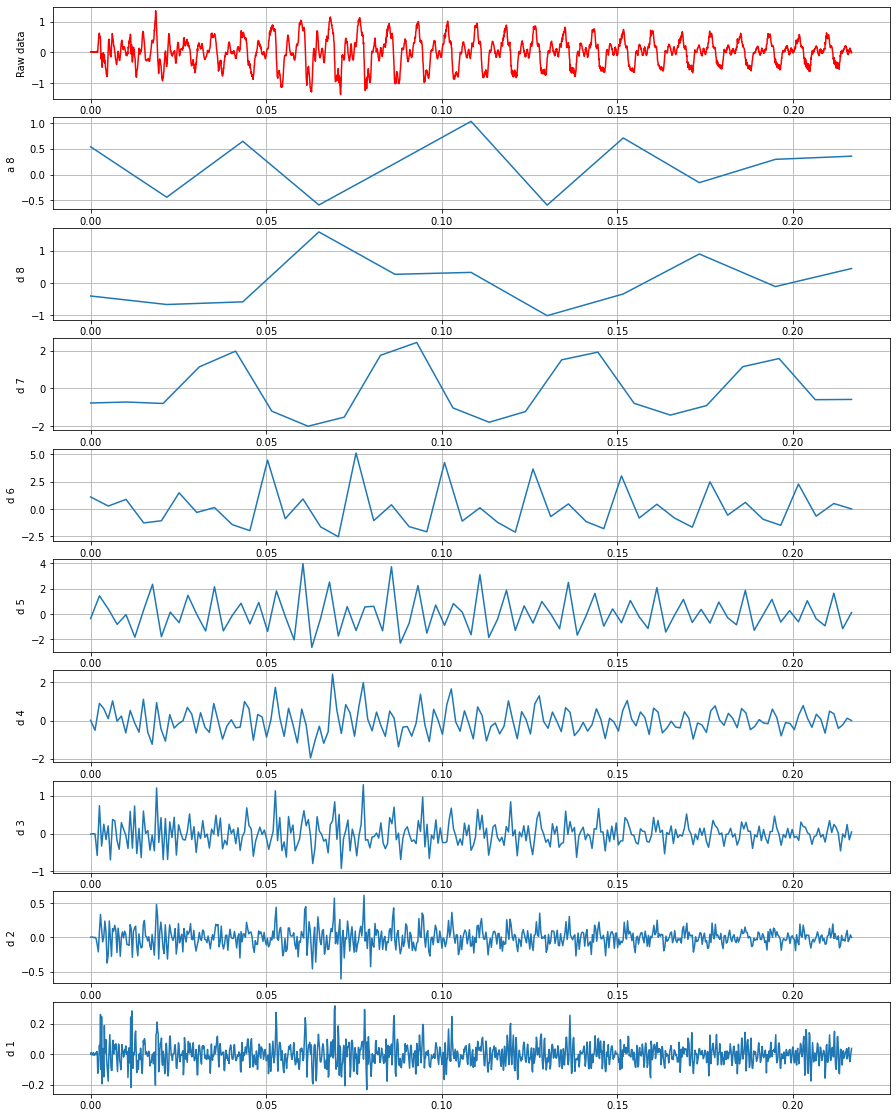

In [8]:
plt.figure(figsize=(15,20))

plt.subplot(Level+2,1,1)
plt.plot(Data.iloc[:,0] , Data.iloc[:,1], color='r')
plt.ylabel('Raw data')
plt.grid()

plt.subplot(Level+2,1,2)
Time_temp = np.arange( 0 , 0.2167 + 0.2167/(len(Coefficient[0])-1) , 0.2167/(len(Coefficient[0])-1) )
plt.plot(Time_temp , Coefficient[0])
plt.ylabel('a %d' %(Level))
plt.grid()

for k in range(1,Level+1):
    plt.subplot(Level+2,1,k+2)
    Time_temp = np.arange( 0 , 0.2167 + 0.2167/(len(Coefficient[k])-1) , 0.2167/(len(Coefficient[k])-1) )
    plt.plot(Time_temp , Coefficient[k])
    plt.ylabel('d %d'%(Level+1-k))
    plt.grid()

plt.show()